2023-06-03 14:57:14.125292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 14:57:30.606570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
1875/1875 [==============================] - 44s 22ms/step - loss: 0.4988 - acc: 0.8462 - val_loss: 0.1579 - val_acc: 0.9581
Epoch 2/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1397 - acc: 0.9567 - val_loss: 0.0935 - val_acc: 0.9743
Epoch 3/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1003 - acc: 0.9686 - val_loss: 0.0803 - val_acc: 0.9775
Epoch 4/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0814 - acc: 0.9740 - val_loss: 0.0574 - val_acc: 0.9819
Epoch 5/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0707 - acc: 0.9778 - val_loss: 0.0569 - val_acc: 0.9839
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0624 - acc: 0.9805 - val_loss: 0.0496 - val_acc: 0.9856
Epoch 7/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0552 - acc: 0.9819 - val_loss: 0.0438 - val_acc: 0.9877
Epoch 8/15
1875/1875 [==========================

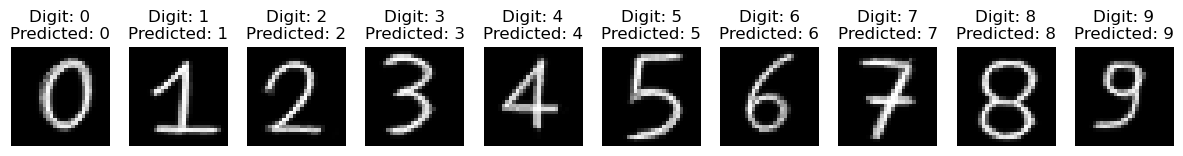

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


def create_CNN():
    #ora ho immagine 28x28x1
    
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space cioe' 5x5)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) #primi 10 filtri
    #qui non volevo dropout perche sono pochi
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(25, kernel_size=(5, 5), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(150, activation='relu'))
    
    #droout da qualche oarte per impedirgli di overfittare?????? 
    model.add(Dense(10, activation='softmax')) 
    #we need a soft-max layer with num_classes=10 possible outputs as output layer
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['acc'])
    return model


# training parameters
batch_size = 32
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from PIL import Image

digit_filename = ["Numeri/0.png", "Numeri/1.png", "Numeri/2.png", "Numeri/3.png", "Numeri/4.png",
                 "Numeri/5.png", "Numeri/6.png", "Numeri/7.png", "Numeri/8.png", "Numeri/9.png"]

dataset=[]
for d in digit_filename:
    digit_in = Image.open(d).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]/255

    dataset.append(data)

prediction=[0,0,0,0,0,0,0,0,0,0]
for i in range (10):
    dataset[i] = dataset[i].reshape(1,xdim,ydim,1)
    prediction[i] = model_CNN.predict(dataset[i], verbose=0)
    dataset[i] = dataset[i].reshape(xdim,ydim)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Digits Predictions:')
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(dataset[i], cmap='gray')    
    #plt.title("Digit: {}\nPredicted: {}".format(np.argmax(str(i)), np.argmax(prediction[i])))   
    plt.title("Digit: " + str(i) + "\nPredicted: {}".format(np.argmax(prediction[i]))) 
    plt.axis('off') 
plt.show()

Per il riconoscimento dei numeri abbiamo utilizzato 15 epoche perche' ci da' un giusto equilibrio in termini di buoni valori di accuratezza e loss e tempo di ottimizzazione del network, circa 11 minuti, ma, in realta', alla rete bastano 5 epoche per andare a ricnoscere tutte e 10 le cifre numeriche nonostante la semplicita' della rete!

Confrontiamo ora la CNN con il DNN costruito nell'esercizio 12.1 per vedere se anch'esso riesce a riconoscere le cifre da noi scritte a mano. Utilizzeremo lo stochastic gradient descent, che si e' rivelato essere il migliore ottimizzatore per questo problema di classificazione, utilizzando sempre 15 epoche, per effettuare un confronto reale col CNN.

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7696 - accuracy: 0.7738 - val_loss: 0.3098 - val_accuracy: 0.9142
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3850 - accuracy: 0.8899 - val_loss: 0.2398 - val_accuracy: 0.9304
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.9111 - val_loss: 0.2012 - val_accuracy: 0.9410
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9242 - val_loss: 0.1755 - val_accuracy: 0.9480
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.9337 - val_loss: 0.1607 - val_accuracy: 0.9508
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2180 - accuracy: 0.9388 - val_loss: 0.1459 - val_accuracy: 0.9568
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1972 - accuracy: 0.9441 - val_loss: 0.1340 - val_accuracy:

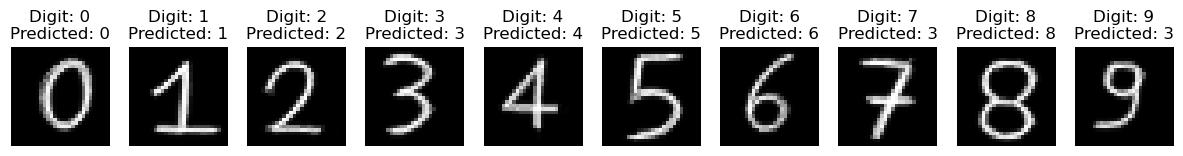

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

#creiamo il depp neural network
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5, cioe' ne spengo la meta': questo layer funziona solo nel training
    #quini e' plausibile che la loss sul test sia minore di quella del train perche' nel test usa tutti i neuroni
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(choosen_optimizer): #standard optimizer=SGD()
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=choosen_optimizer, metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 15 

# create the deep conv net
model_DNN= compile_model('sgd') #il migliore trovato nel 12.1

# train CNN
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from PIL import Image

digit_filename = ["Numeri/0.png", "Numeri/1.png", "Numeri/2.png", "Numeri/3.png", "Numeri/4.png",
                 "Numeri/5.png", "Numeri/6.png", "Numeri/7.png", "Numeri/8.png", "Numeri/9.png"]

dataset=[]
for d in digit_filename:
    digit_in = Image.open(d).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]/255

    dataset.append(data)

prediction=[0,0,0,0,0,0,0,0,0,0]
for i in range (10):
    dataset[i] = dataset[i].reshape(1,xdim*ydim)
    prediction[i] = model_DNN.predict(dataset[i], verbose=0)
    dataset[i] = dataset[i].reshape(xdim,ydim)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Digits Predictions:')
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(dataset[i], cmap='gray')    
    #plt.title("Digit: {}\nPredicted: {}".format(np.argmax(str(i)), np.argmax(prediction[i])))   
    plt.title("Digit: " + str(i) + "\nPredicted: {}".format(np.argmax(prediction[i]))) 
    plt.axis('off') 
plt.show()



Possiamo osservare come il DNN non riesca a predire tutte le cifre scritte da noi a mano nonostante sia riuscito ad andare oltre le nostre aspettative azzeccandone la maggior parte.